In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from numba import jit

from dataclasses import dataclass


@dataclass
class Vector3D:
    x: float
    y: float
    z: float


@dataclass
class Line3D:
    origin: Vector3D
    direction: Vector3D


@dataclass
class Sphere:
    center: Vector3D
    radius: float


def intersection_line_sphere(line: Line3D, sphere: Sphere) -> Vector3D | None:
    # Shift the line and sphere to make the sphere centered at the origin
    shifted_origin = np.array([line.origin.x - sphere.center.x,
                               line.origin.y - sphere.center.y,
                               line.origin.z - sphere.center.z])

    # Compute coefficients for the quadratic equation
    direction = np.array([line.direction.x, line.direction.y, line.direction.z])
    a = np.dot(direction, direction)
    b = 2 * np.dot(direction, shifted_origin)
    c = np.dot(shifted_origin, shifted_origin) - sphere.radius ** 2

    # Compute the discriminant
    discriminant = b ** 2 - 4 * a * c

    # Check if there are real solutions
    if discriminant < 0:
        # No intersection
        return None

    # Compute the two possible intersection points
    t1 = (-b + np.sqrt(discriminant)) / (2 * a)
    t2 = (-b - np.sqrt(discriminant)) / (2 * a)

    # Select the closest intersection point
    t = min(t1, t2)

    # Compute the intersection point
    intersection_point = Vector3D(line.origin.x + t * line.direction.x,
                                  line.origin.y + t * line.direction.y,
                                  line.origin.z + t * line.direction.z)

    return intersection_point



In [13]:
@jit
def point_in_disk(radius: float) -> (float, float):
    phi = random.uniform(0, 2 * np.pi)
    r = radius * np.sqrt(random.uniform(0, 1))
    x = r * np.cos(phi)
    y = r * np.sin(phi)
    return x, y


def sample_theta_sphere():
    radius = 20.0

    while True:
        x, y = point_in_disk(radius)
        phi = random.uniform(0, 2 * np.pi)
        theta = random.uniform(0, np.pi * 0.5)  # use whatever distribution you want

        line = Line3D(Vector3D(x, 1, y),
                      Vector3D(np.sin(theta) * np.cos(phi), - np.cos(theta), np.sin(theta) * np.sin(phi)))
        sphere = Sphere(Vector3D(0, 0, 0), 1)
        intersection = intersection_line_sphere(line, sphere)

        if intersection is not None:
            return theta


n = 100000
theta_sphere = np.zeros(n)
for i in range(n):
    theta_sphere[i] = sample_theta_sphere()

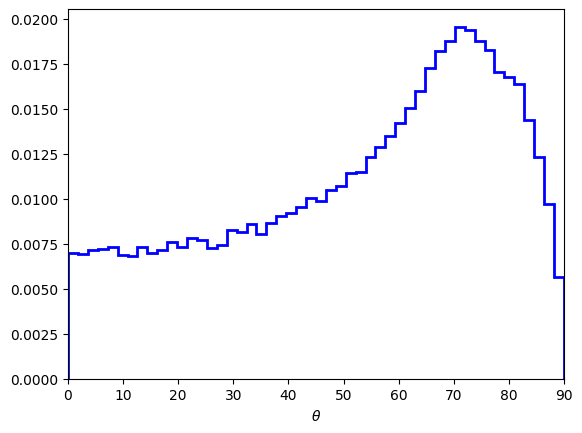

In [12]:
plt.hist(np.degrees(theta_sphere), bins=50, density=True, histtype='step', color='blue', linewidth=2)
plt.xlim(0, 90)
plt.xlabel(r'$\theta$')
plt.show()

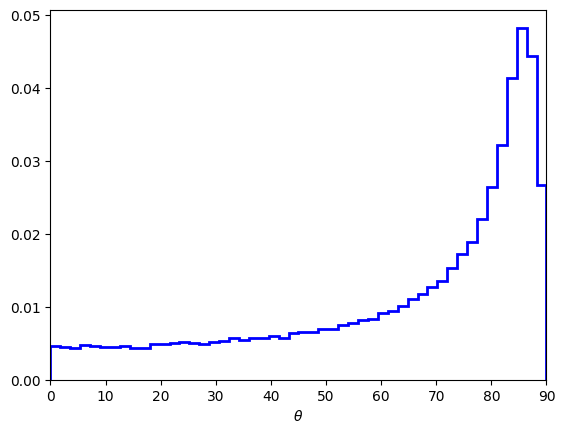

In [14]:
plt.hist(np.degrees(theta_sphere), bins=50, density=True, histtype='step', color='blue', linewidth=2)
plt.xlim(0, 90)
plt.xlabel(r'$\theta$')
plt.show()